# Lab

This notebook serves for quick experimentation.

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import requests

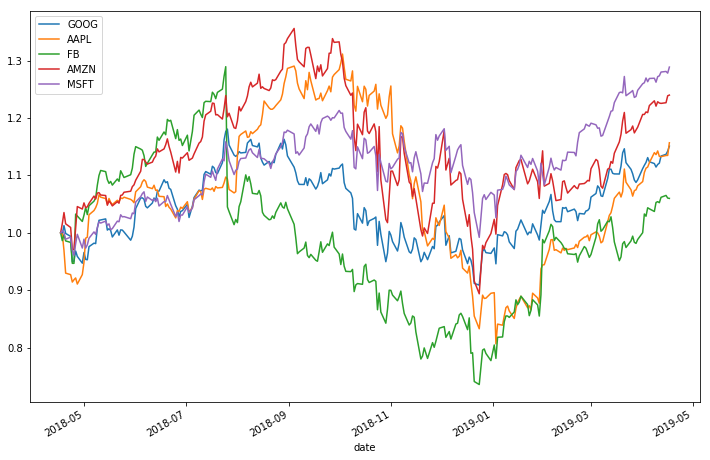

In [30]:
stocks = ["GOOG", "AAPL", "FB", "AMZN", "MSFT"]

stocks_df = None
for stock in stocks:
    data = requests.get(f"https://api.iextrading.com/1.0/stock/{stock}/chart/1y").json()
    stock_df = pd.DataFrame.from_dict(data)
    stock_df['date'] = pd.to_datetime(stock_df['date'], format="%Y-%m-%d")
    stock_df = stock_df.set_index('date')
    stock_df = stock_df[["close"]]
    stock_df.columns = [ stock ]
    stock_df = stock_df / stock_df[stock][0]
    if stocks_df is None:
        stocks_df = stock_df
    else:
        stocks_df = stocks_df.join(stock_df)
    
stocks_df.plot(figsize=(12,8))